In [5]:
from dotenv import load_dotenv
import os
load_dotenv('../.env')

True

In [6]:
def read_file(file_path):
    result = None
    with open(file_path, 'r') as file:
        result = file.read()
    if result is None:
        raise Exception('Error reading file')
    return result

In [10]:
import google.generativeai as genai
genai.configure(api_key=os.environ["GEMINI_KEY"])
model = genai.GenerativeModel("gemini-1.5-flash")


In [ ]:
noticia = read_file("../data/positive-news.txt")
prompt = f"""
Resuma a pagina de noticias, <NOTICIA> retornando uma breve descrição, com até 3 frases, sobre as informações mais importantes das notícias.

Aqui está um exemplo de resumo:

<NOTICIA>
"A empresa X lançou um novo smartphone no mercado."
###
<RESUMO>
"A empresa X anunciou o lançamento de um novo smartphone, trazendo inovações tecnológicas e maior duração de bateria."

Agora, faça o resumo das noticias abaixo:
<NOTICIA>
"{noticia}"
###
<RESUMO>
"""
response = model.generate_content(prompt)

In [14]:
print(response.text)

<RESUMO>
Esta semana, a premiação Earthshot revelou seus vencedores, o Reino Unido testou uma semana de trabalho de quatro dias e pesquisas sobre câncer deram um passo adiante. Além disso, a ONU se prepara para assinar um tratado importante sobre poluição plástica, e uma nova instituição de caridade está se unindo a bancos de alimentos britânicos para fornecer livros para leitura, empréstimo ou doação. As emissões líquidas totais de gases de efeito estufa na UE caíram 8% no ano passado, e práticas antigas de manejo de florestas estão sendo reconhecidas para combater os incêndios florestais que se tornam mais comuns devido às mudanças climáticas.



In [18]:
noticia1 = read_file("../data/pn-plastic-pollution.txt")
noticia2 = read_file("../data/pn-sustainable-farming.txt")
noticia3 = read_file("../data/pn-the-art-of-fire.txt")

prompt = f"""
A partir das seguintes noticias <NOTICIAS> liste cada nome de Pessoa, Organização ou Evento  presentes no texto.

Aqui está um exemplo de resumo:

<NOTICIAS>
"A empresa X lançou um novo smartphone no mercado, Fulano de Tal comenta sobre o lançamento na E3."
"Beltrano comenta sobre a nova tecnologia da empresa Y."
###
<LISTA>
- Empresa X
- Fulano de Tal
- E3
- Beltrano
- Empresa Y

Agora, faça o resumo das noticias abaixo:
<NOTICIAS>
"{noticia1}"
"{noticia2}"
"{noticia3}"
###
<LISTA>
"""
response = model.generate_content(prompt)
#prompt

In [19]:
print(response.text)

## <LISTA>

**Pessoas:**

- Jo Caird
- Lori Goff
- Christina Thurner
- Bénédicte Garbil
- Jen Keane
- Tim May
- Rosie Jack
- Clare Hill
- Chris Saunders
- Martin Wright
- Lynne Hardy
- Andrew Avitt
- Fern McErlane

**Organizações:**

- United Nations
- Organisation for Economic Co-operation and Development (OECD)
- Outlander Materials
- Grown bio
- Ecovative Design LLC
- Carbios
- Modern Synthesis
- Ganni
- Pitch Up!
- Kingsclere Estates
- Balcaskie Estate
- Scotland The Bread
- Planton Farm
- The Roaming Dairy
- The Roaming Smoker
- Sandhills Prescribed Burn Association
- US Forest Service
- The Nature Conservancy
- Positive News 
- Imagine5

**Eventos:**

- Global Plastic Treaty
- End Plastic Pollution Resolution
- Wildfires in North America
- British Columbia (BC) fire disaster in 2021
- Pitch Up! application season (2024)

**Outros:**

- Salish
- Coast Miwok
- Native communities of Australia’s Northern Territories
- Prescribed burns
- Bacterial nanocellulose 
- Mycelium packaging
-

In [20]:
import tiktoken

# Função para estimar número de tokens
def estimar_tokens(texto):
    encoder = tiktoken.get_encoding("cl100k_base")  # Exemplo de codificação
    # encoder = tiktoken.get_encoding("gpt-4o")  # Exemplo de codificação
    tokens = encoder.encode(texto)
    return tokens

In [ ]:
from vertexai.preview import tokenization

model_name = "gemini-1.5-flash-001"
tokenizer = tokenization.get_tokenizer_for_model(model_name)


In [45]:
contents = read_file("../data/5000-words.txt")
result = tokenizer.count_tokens(contents)

print(f"{result.total_tokens = :,}")

result.total_tokens = 6,341


In [2]:
import yaml


with open("../roteiros.yaml") as stream:
    try:
        roteiros = yaml.safe_load(stream)
    except yaml.YAMLError as exc:
        print(exc)

roteiros

{'roteiro': {'atenas': 'Como um especialista em turismo, liste os 3 principais pontos turísticos de Atenas, Gŕecia, informando o número anual de visitantes e uma breve descrição de cada um.',
  'roma': 'Como um especialista em turismo, liste os 3 principais pontos turísticos de Roma, Itália, informando o número anual de visitantes e uma breve descrição de cada um.'}}

In [37]:
# para cada roteiro in roteiros fazer o prompt e salvar o resultado em variavel
roteiro_responses = []
for roteiro in roteiros.values():
    for cidade in roteiro.keys():
        prompt = roteiro[cidade]
        response = model.generate_content(prompt)
        roteiro_responses.append(response.text)

print(roteiro_responses) 

['## Os 3 principais pontos turísticos de Atenas, Grécia:\n\n1. **Acrópole de Atenas:**\n\n* **Número anual de visitantes:** Aproximadamente 3 milhões de pessoas por ano.\n* **Descrição:** Considerada um dos marcos mais icônicos da Grécia e do mundo, a Acrópole é um complexo de construções antigas no topo de uma colina rochosa. Inclui monumentos como o Parthenon, o Erechtheion, a Porta dos Propileus e o Templo de Atena Niké. A Acrópole oferece vistas panorâmicas da cidade e é um testemunho da grandeza da civilização grega.\n\n2. **Fórum Romano:**\n\n* **Número anual de visitantes:** Aproximadamente 2 milhões de pessoas por ano.\n* **Descrição:** O Fórum Romano é um complexo de edifícios romanos construídos no século II d.C., que foi o centro da vida pública e comercial da cidade. Inclui o Templo de Zeus Olímpico, a Biblioteca de Adriano e a Torre dos Ventos. O Fórum Romano oferece uma visão fascinante da influência romana na Grécia.\n\n3. **Museu da Acrópole:**\n\n* **Número anual de v

In [72]:

with open("../roteiros-v2.yaml") as stream:
    try:
        roteiros2 = yaml.safe_load(stream)
    except yaml.YAMLError as exc:
        print(exc)

roteiros2

{'roteiro': {'atenas': "Como um especialista em turismo, liste os 3 principais pontos turísticos de Atenas, Gŕecia, informando o número anual de visitantes e uma breve descrição de cada um. A saida deverá ser no formato Json, como <exemplo>.\n###\n<exemplo>\n { pontosTuristicos: [{{cidade: 'Atenas', nome:'Ponto turistico 1', visitantesAno: '9.209', descricao: 'breve descrição sobre ponto turistico'}}]}",
  'roma': "Como um especialista em turismo, liste os 3 principais pontos turísticos de Roma, Itália, informando o número anual de visitantes e uma breve descrição de cada um. A saida deverá ser no formato Json, como <exemplo>.\n###\n<exemplo>\n{  pontosTuristicos: [{{cidade: 'Roma', nome:'Ponto turistico 1', visitantesAno: '7.923', descricao: 'breve descrição sobre ponto turistico'}}]}"}}

In [73]:
# para cada roteiro in roteiros fazer o prompt e salvar o resultado em variavel
roteiro2_responses = []
for roteiro in roteiros2.values():
    for cidade in roteiro.keys():
        prompt = roteiro[cidade]
        response = model.generate_content(prompt)
        roteiro2_responses.append(response.text)


print(roteiro2_responses) 

['```json\n{\n  "pontosTuristicos": [\n    {\n      "cidade": "Atenas",\n      "nome": "Acrópole",\n      "visitantesAno": "7.000.000+",\n      "descricao": "Um dos monumentos mais icônicos da Grécia antiga, a Acrópole de Atenas é um complexo de edifícios históricos, incluindo o Partenon, um templo dedicado à deusa Atena. Oferece vistas deslumbrantes da cidade e é um testemunho da grandeza da civilização grega."\n    },\n    {\n      "cidade": "Atenas",\n      "nome": "Fórum Romano",\n      "visitantesAno": "1.500.000+",\n      "descricao": "Localizado no coração de Atenas, o Fórum Romano é um antigo espaço público que abriga ruínas de templos, bibliotecas e outros edifícios construídos durante a época romana. É um local fascinante para aprender sobre a história da cidade durante a época romana."\n    },\n    {\n      "cidade": "Atenas",\n      "nome": "Museu da Acrópole",\n      "visitantesAno": "1.400.000+",\n      "descricao": "O Museu da Acrópole abriga uma coleção impressionante d

In [88]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# parse response as json array
def parseResponse(text):
    #text = str.replace(text, "\n", "").replace(text, "```json", "").replace(text, "```", "")
    js = json.loads(text)
    print(js)
    #return js["pontosTuristicos"]

pontos_turisticos = []
for response in roteiro2_responses:
    response = response.replace("```json","").replace("```","").replace("\\n","")
    #print(response)
    js = json.loads(response)
    pontos_turisticos.extend(js["pontosTuristicos"])

df = pd.DataFrame(pontos_turisticos)
#print(pontos_turisticos)
df["visitantesAno"] = df["visitantesAno"].apply(lambda x: x.replace(".","").replace("+",""))
df["visitantesAno"] =  pd.to_numeric(df["visitantesAno"])
df["color"] = df["cidade"].apply(lambda x: "red" if x == "Atenas" else "blue")
df

,cidade,nome,visitantesAno,descricao,color
0,Atenas,Acrópole,7000000,Um dos monumentos mais icônicos da Grécia anti...,red
1,Atenas,Fórum Romano,1500000,"Localizado no coração de Atenas, o Fórum Roman...",red
2,Atenas,Museu da Acrópole,1400000,O Museu da Acrópole abriga uma coleção impress...,red
3,Roma,Coliseu,7400000,"Um anfiteatro romano antigo, construído em 80 ...",blue
4,Roma,Fórum Romano,4500000,"Um antigo centro cívico, religioso e comercial...",blue
5,Roma,Museus do Vaticano,6000000,Um complexo de museus dentro da Cidade do Vati...,blue


Text(0.5, 1.0, 'Pontos turísticos mais visitados')

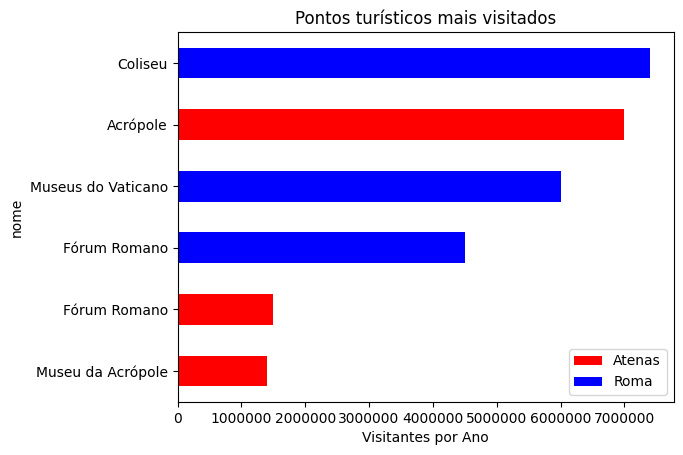

In [89]:

df = df.sort_values('visitantesAno', ascending=True)
ax = df.plot.barh(x='nome',y='visitantesAno', color=df['color'])
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: "{:.0f}".format(x)))

# Add custom legend entries
handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles[:2], labels[:2])
ax.legend(
    [
        Patch(facecolor="red"),
        Patch(facecolor="blue")
    ], ["Atenas", "Roma"]
)
#ax.legend(["Atenas", "Roma"])
plt.xlabel('Visitantes por Ano')
plt.title("Pontos turísticos mais visitados")